In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
path = "/content/drive/MyDrive/TELCO/telco_numeric.csv"
telco = pd.read_csv(path, index_col=0)

In [ ]:
telco.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
1 - sum(y_test)/len(y_test) #baseline accuracy

0.7345635202271115

In [ ]:
#multicollinear variables determined with inflation factors
telco = telco.drop(['MonthlyCharges', 'PhoneService_Yes',
                    'TotalCharges', 'InternetService_No'], axis=1)

In [ ]:
features = telco.copy()
labels = features.pop('Churn_Yes')
#features = StandardScaler().fit_transform(features) #this can be done with the model itself
features = np.array(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.05, stratify=labels, random_state=42)

In [ ]:
smote = SMOTE(random_state=36) #this made model rather worse
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6690, 19), (353, 19), (6690,), (353,))

In [ ]:
n_features = X_train.shape[1]
n_classes = 2
# define the keras model
#https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/
model = Sequential()
model.add(Normalization())
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_classes, activation='softmax')) #this has to have 1 unit for binary classifier

In [ ]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=30, batch_size=256, verbose=2)

Epoch 1/30
27/27 - 0s - loss: 0.5179 - accuracy: 0.7357
Epoch 2/30
27/27 - 0s - loss: 0.4995 - accuracy: 0.7471
Epoch 3/30
27/27 - 0s - loss: 0.4779 - accuracy: 0.7655
Epoch 4/30
27/27 - 0s - loss: 0.4605 - accuracy: 0.7779
Epoch 5/30
27/27 - 0s - loss: 0.4486 - accuracy: 0.7882
Epoch 6/30
27/27 - 0s - loss: 0.4396 - accuracy: 0.7889
Epoch 7/30
27/27 - 0s - loss: 0.4326 - accuracy: 0.7925
Epoch 8/30
27/27 - 0s - loss: 0.4294 - accuracy: 0.7952
Epoch 9/30
27/27 - 0s - loss: 0.4273 - accuracy: 0.7963
Epoch 10/30
27/27 - 0s - loss: 0.4271 - accuracy: 0.7976
Epoch 11/30
27/27 - 0s - loss: 0.4219 - accuracy: 0.7984
Epoch 12/30
27/27 - 0s - loss: 0.4210 - accuracy: 0.8025
Epoch 13/30
27/27 - 0s - loss: 0.4217 - accuracy: 0.8021
Epoch 14/30
27/27 - 0s - loss: 0.4194 - accuracy: 0.8007
Epoch 15/30
27/27 - 0s - loss: 0.4172 - accuracy: 0.8012
Epoch 16/30
27/27 - 0s - loss: 0.4176 - accuracy: 0.8001
Epoch 17/30
27/27 - 0s - loss: 0.4155 - accuracy: 0.8027
Epoch 18/30
27/27 - 0s - loss: 0.4150 - 

In [ ]:
# evaluate on test set
yhat = model.predict(X_test)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.802


In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       259
           1       0.68      0.49      0.57        94

    accuracy                           0.80       353
   macro avg       0.75      0.70      0.72       353
weighted avg       0.79      0.80      0.79       353



In [ ]:
print(confusion_matrix(y_test, yhat))

[[231  28]
 [ 41  53]]


In [ ]:
model.predict(X_test)

array([[0.16234323, 0.83765674],
       [0.96767306, 0.03232691],
       [0.9607039 , 0.03929607],
       ...,
       [0.9291644 , 0.07083553],
       [0.93653965, 0.06346037],
       [0.9338224 , 0.06617755]], dtype=float32)

In [ ]:
#from Anderson and Guvenc model
ann = Sequential()
ann.add(Dense(units = 200,activation="relu", kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.2))
ann.add(Dense(units = 100, activation="relu",kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.2))
ann.add(Dense(units = 50, activation="relu",kernel_regularizer=l2(0.001)))
ann.add(Dense(1, activation="sigmoid"))

ann.compile(optimizer = "adam", loss="binary_crossentropy",metrics=["accuracy"])

callback = EarlyStopping(monitor="val_loss", patience=2)
history = ann.fit(x=X_train, y=y_train, validation_data=(X_test,y_test),
                  batch_size=16, epochs=5, callbacks=[callback])

Epoch 1/5
419/419 [==============================] - 2s 3ms/step - loss: 0.6371 - accuracy: 0.7779 - val_loss: 0.5666 - val_accuracy: 0.7904
Epoch 2/5
419/419 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7948 - val_loss: 0.5363 - val_accuracy: 0.7705
Epoch 3/5
419/419 [==============================] - 1s 2ms/step - loss: 0.5217 - accuracy: 0.7982 - val_loss: 0.5200 - val_accuracy: 0.7819
Epoch 4/5
419/419 [==============================] - 1s 2ms/step - loss: 0.5001 - accuracy: 0.7975 - val_loss: 0.4936 - val_accuracy: 0.8045
Epoch 5/5
419/419 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.7999 - val_loss: 0.4991 - val_accuracy: 0.7734


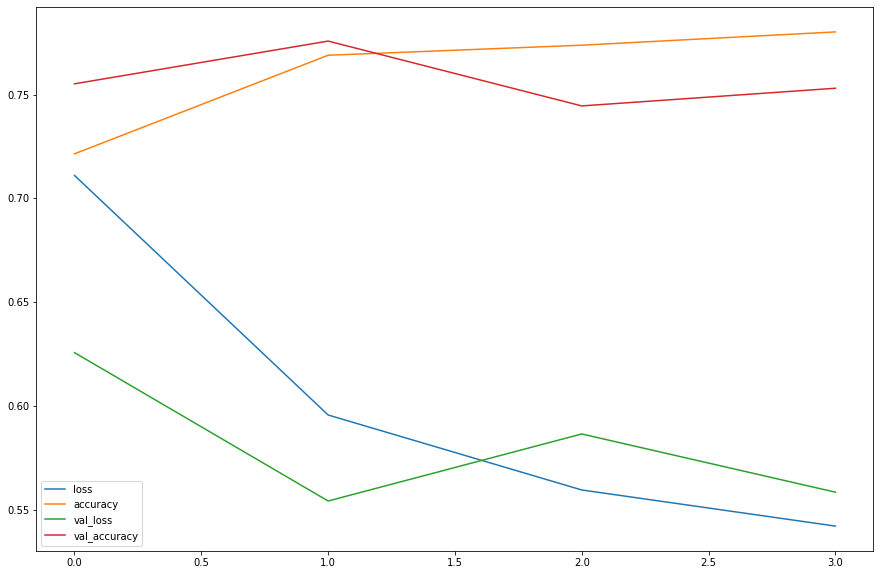

In [ ]:
pd.DataFrame(ann.history.history).plot(figsize=(15,10))

In [ ]:
predictions = ann.predict_classes(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[240  19]
 [ 61  33]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       259
           1       0.63      0.35      0.45        94

    accuracy                           0.77       353
   macro avg       0.72      0.64      0.65       353
weighted avg       0.75      0.77      0.75       353

0.773371104815864


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
